你可以使用 *shift + 来尝试 notebook中的每一行代码. 来试一试吧!

检查您是否安装了最新版本的TensorFlow v1.3或更高版本。

In [1]:
import tensorflow as tf
print("You have version %s" % tf.__version__)

You have version 1.2.1


检查Matplotlib是否正在工作。 运行这个单元格后，您应该会在下面看到一个图形。

In [2]:
%matplotlib inline
import pylab
import numpy as np

# create some data using numpy. y = x * 0.1 + 0.3 + noise
x = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x))
y = x * 0.1 + 0.3 + noise

# plot it
pylab.plot(x, y, '.')

ModuleNotFoundError: No module named 'matplotlib'

检查Numpy和Pillow是否正常工作。 运行这个单元格后，您应该会在下面看到一个随机图像。

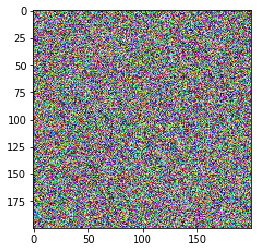

In [3]:
import PIL.Image as Image
import numpy as np
from matplotlib.pyplot import imshow

image_array = np.random.rand(200,200,3) * 255
img = Image.fromarray(image_array.astype('uint8')).convert('RGBA')
imshow(np.asarray(img))

检查 Pandas 是否正在工作。 运行这个单元后，你应该看到下面的表格。

In [4]:
import pandas as pd
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
BabyDataSet = list(zip(names,births))
pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


很好，我们可以开始TensorFlow零基础入门了

### 数据流图
从内部机制上来说，TF就是建立数据流图来进行数值计算。所以，当你使用TF来搭建模型时，其实主要涉及两个方面：根据模型建立计算图，然后送入数据运行计算图得到结果。计算图computational graph是TF中很重要的一个概念，其是由一系列节点（nodes）组成的图模型，每个节点对应的是TF的一个算子（operation）。每个算子会有输入与输出，并且输入和输出都是张量。所以我们使用TF的算子可以构建自己的深度学习模型，其背后的就是一个计算图。还有一点这个计算图是静态的，意思是这个计算图每个节点接收什么样的张量和输出什么样的张量已经固定下来。要运行这个计算图，你需要开启一个会话（session），在session中这个计算图才可以真正运行。我们用一个简单的例子来说明图模型的机理，首先定义一个计算图：

![graph](https://www.tensorflow.org/images/tensors_flowing.gif)

让我们练习一下 做一个简单的数据流图

![graphflow](http://ok33lph8y.bkt.clouddn.com/v2-c95330139f0de5b3e4d98e15fe20df4c_hd.jpg)

In [5]:
a = tf.constant(5, name="input_a") #标量
b = tf.constant(3, name="input_b") #标量
c = tf.multiply(a, b, name="mul_c")#相乘
d = tf.add(a, b, name="add_d")     #相加
e = tf.add(c, d, name="add_e")     #相加

通过上述代码，便完成了第一个小规模数据流图的完整定义。如果在一个Python脚本或shell中执行上述代码，它虽然可以运行，但实际上却不会有任何实质性的结果输出。请注意，这只是整个流程的数据流图定义部分，要想体验一个数据流图的运行效果，还需在上述代码之后添加两行语句，以将数据流图终点的结果输出。

In [8]:
sess = tf.Session() # 创建会话
print(sess.run(c)) # 运行计算图得到e
sess.close() # 关闭会话

15


### 常量 constant
constant是TensorFlow的常量节点，通过constant方法创建，其是计算图（Computational Graph）中的起始节点，是传入数据。

In [9]:
sess = tf.InteractiveSession()
cons1 = tf.constant([1, 2, 3])
print(sess.run(cons1))

[1 2 3]


### 占位符 Placeholders
placeholder是TensorFlow的占位符节点，由placeholder方法创建，其也是一种常量，但是由用户在调用run方法是传递的，也可以将placeholder理解为一种形参。即其不像constant那样直接可以使用，需要用户传递常数值。

In [12]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

c = tf.multiply(a,b,name="mul_c")
d = tf.add(a,b,name="add_d")

e = tf.add(c,d,name="add_e")

with tf.Session() as sess:
    result = sess.run(e,feed_dict={a:6,b:3}) #喂数据
    print(result)

27.0


### 变量 Variable
Vatiable是tensorflow的变量节点，通过Variable（注：V大写）方法创建，并且需要传递初始值。在使用前需要通过tensorflow的初始化方法进行初始化。

In [ ]:
m = tf.Variable(tf.random_normal([1]), name='m')
b = tf.Variable(tf.random_normal([1]), name='b')
# This is the same as y = tf.add(tf.mul(m, x_placeholder), b), but looks nicer
y = m * x_placeholder + b

### Tensor 张量
在学习数据流图的基础知识时，使用简单的标量值是很好的选择。既然我们已经掌握了“数据流”，下面不妨熟悉一下张量的概念。

如前所述，所谓张量，即n维矩阵的抽象。因此，1D张量等价于向量，2D张量等价于矩阵，对于更高维数的张量，可称“N维张量”或“N阶张量”。有了这一概念，便可对之前的示例数据流图进行修改，使其可使用张量。

![tensor](http://ok33lph8y.bkt.clouddn.com/1233.jpg)

现在不再使用两个独立的输入节点，而是换成了一个可接收向量（或1阶张量）的节点。与之前的版本相比，这个新的流图有如下优点：  
1）客户只需将输入送给单个节点，简化了流图的使用。  
2）那些直接依赖于输入的节点现在只需追踪一个依赖节点，而非两个。  
3）这个版本的流图可接收任意长度的向量，从而使其灵活性大大增强。我们还可对这个流图施加一条严格的约束，如要求输入的长度必须为2（或任何我们希望的长度）。


In [18]:
a = tf.constant([3,8], name="input_a") #1阶张量

c = tf.reduce_sum(a, name="mul_c")#相加
b = tf.reduce_prod(a, name="mul_c")#相乘
d = tf.add(c, b, name="add_d")     #相加
with tf.Session() as sess:
    print(sess.run(d))

35


一些张量的列子

In [ ]:
t_0 =50
t_1 = [1,1]
t_2 = [[1],[2]]

在tensorflow中，张量的维数被描述为“阶”，张量是以list的形式存储的。list有几重中括号，对应的张量就是几阶。如t=[ [1,2,3],[4,5,6],[7,8,9] ]，t就是一个二阶张量。

对于t=[ [1,2,3],[4,5,6],[7,8,9] ]来说，它的shape==>[3,3]，shape可以理解成：当脱去最外层的一对中括号后，里面有3个小list，然后每个小list里又有3个元素，所以该张量的shape==>[3,3]。

举几个例子，如[ [1,2,3],[4,5,6] ] 的shape=[2,3](因为当脱去最外层的一对中括号后，里面有2个小list，然后每个小list里又有3个元素，所以该张量的shape==>[2,3]。）

### Session 会话

In [ ]:
m1 = tf.constant([[2, 2]])
m2 = tf.constant([[3],
                  [3]])
dot_operation = tf.matmul(m1, m2)

#print(dot_operation)  # wrong! no result

# method1 use session
sess = tf.Session()
result = sess.run(dot_operation)
print(result)
sess.close()

# method2 use session
with tf.Session() as sess:
    result_ = sess.run(dot_operation)
    print(result_)